In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Credit_card=pd.read_csv('/content/drive/MyDrive/credit_card.csv')
Credit_card.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [ ]:
Credit_card.shape

(8950, 18)

In [ ]:
Credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
Credit_card.isnull().sum()

,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0
CASH_ADVANCE_FREQUENCY,0


In [ ]:
Credit_card.drop(['CUST_ID'],axis=1,inplace=True)

In [ ]:
Credit_card.dropna(inplace=True)


In [ ]:
Credit_card.shape

(8636, 17)

In [ ]:
Credit_card.dtypes

,0
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64
CASH_ADVANCE_FREQUENCY,float64


In [ ]:
Credit_card.duplicated().sum()

0

In [ ]:
from scipy import stats
# Calculate Z-scores for all columns
z = np.abs(stats.zscore(Credit_card.select_dtypes(include=np.number)))

# Set a threshold for outlier detection (e.g., 3 standard deviations)
threshold = 3

# Identify outlier indices
outlier_indices = np.where(z > threshold)

# Remove outliers from the DataFrame
Credit_card_no_outliers = Credit_card[(z < threshold).all(axis=1)]

print("Shape before outlier removal:", Credit_card.shape)
print("Shape after outlier removal:", Credit_card_no_outliers.shape)

Shape before outlier removal: (8636, 17)
Shape after outlier removal: (7190, 17)


In [ ]:
Credit_card_no_outliers = Credit_card_no_outliers.reset_index(drop=True)

In [ ]:
Credit_card_no_outliers = Credit_card_no_outliers.drop_duplicates()

In [ ]:
Credit_card_no_outliers.shape

(7190, 17)

In [ ]:
# Calculate the correlation matrix
corr_matrix = Credit_card_no_outliers.corr()

# Set a threshold for correlation
corr_threshold = 0.8  # Adjust as needed

# Find highly correlated features
highly_correlated_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > corr_threshold:
            colname = corr_matrix.columns[i]
            highly_correlated_features.add(colname)

# Remove highly correlated features
Credit_card_no_corr = Credit_card_no_outliers.drop(columns=highly_correlated_features)

print("Shape before removing correlated features:", Credit_card_no_outliers.shape)
print("Shape after removing correlated features:", Credit_card_no_corr.shape)

Shape before removing correlated features: (7190, 17)
Shape after removing correlated features: (7190, 14)


In [ ]:
Credit_card_no_corr.shape

(7190, 14)

In [ ]:
from sklearn.decomposition import PCA
# Assuming 'Credit_card_no_corr' is your DataFrame after preprocessing

# Initialize PCA with 95% variance explained
pca = PCA(n_components=0.95)

# Fit and transform the data
Credit_card_pca = pca.fit_transform(Credit_card_no_corr)

# Get the number of components after reduction
n_components = pca.n_components_
print("Number of components after PCA:", n_components)

Number of components after PCA: 5


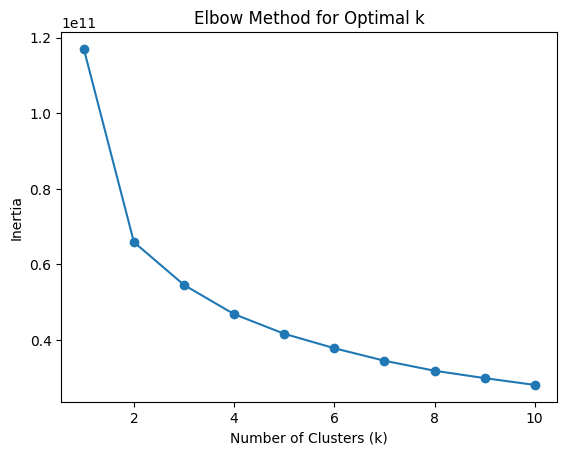

In [ ]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(Credit_card_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

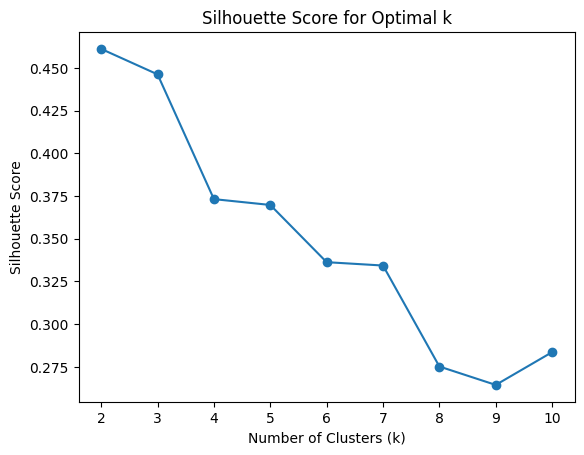

Optimal number of clusters (k): 2


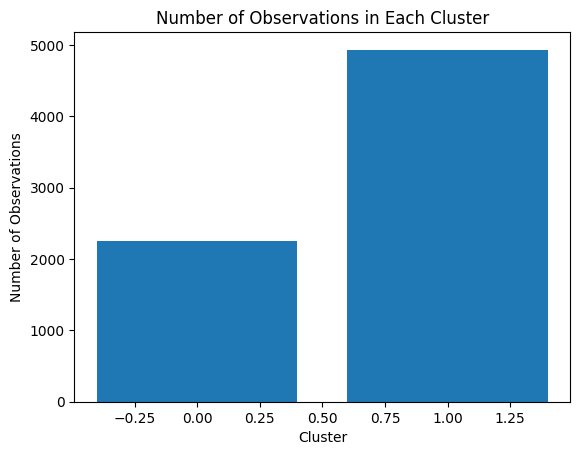

In [ ]:
from sklearn.metrics import silhouette_score

# Calculate silhouette scores for different values of k
silhouette_scores = []
for i in range(2, 11):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(Credit_card_pca)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(Credit_card_pca, labels))

# Plot the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Find the optimal k with the highest silhouette score
optimal_k = np.argmax(silhouette_scores) + 2  # Add 2 because we started from k=2
print("Optimal number of clusters (k):", optimal_k)

# Build the K-means clustering model with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(Credit_card_pca)

# Get cluster labels
cluster_labels = kmeans.labels_

# Count the number of observations in each cluster
cluster_counts = np.bincount(cluster_labels)

# Create a bar plot to visualize cluster distribution
plt.bar(range(optimal_k), cluster_counts)
plt.title('Number of Observations in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.show()